In [2]:
from google.cloud import bigquery
import pandas as pd

client = bigquery.Client()

query = """
SELECT *
FROM `churn_analytics.customer_features`
"""

df = client.query(query).to_dataframe()

df.head()

d:\Python\PythonCode\venv\Lib\site-packages\google\cloud\bigquery\table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,customer_id,churn_flag,is_male,senior_citizen,has_partner,has_dependents,tenure,tenure_group,phone_service,multiple_lines,...,tech_support,streaming_tv,streaming_movies,service_count,contract,paperless_billing,payment_method,monthly_charges,total_charges,avg_monthly_spend
0,2923-ARZLG,0,1,0,1,1,0,0-1_year,1,0,...,0,0,0,1,One year,1,Mailed check,19.70,NaN,NaN
1,7644-OMVMY,0,1,0,1,1,0,0-1_year,1,0,...,0,0,0,1,Two year,0,Mailed check,19.85,NaN,NaN
2,2520-SGTTA,0,0,0,1,1,0,0-1_year,1,0,...,0,0,0,1,Two year,0,Mailed check,20.00,NaN,NaN
3,3115-CZMZD,0,1,0,0,1,0,0-1_year,1,0,...,0,0,0,1,Two year,0,Mailed check,20.25,NaN,NaN
4,3213-VVOLG,0,1,0,1,1,0,0-1_year,1,1,...,0,0,0,2,Two year,0,Mailed check,25.35,NaN,NaN


In [3]:
df.info()
df.isna().mean().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   churn_flag         7043 non-null   Int64  
 2   is_male            7043 non-null   Int64  
 3   senior_citizen     7043 non-null   Int64  
 4   has_partner        7043 non-null   Int64  
 5   has_dependents     7043 non-null   Int64  
 6   tenure             7043 non-null   Int64  
 7   tenure_group       7043 non-null   object 
 8   phone_service      7043 non-null   Int64  
 9   multiple_lines     7043 non-null   Int64  
 10  internet_service   7043 non-null   Int64  
 11  online_security    7043 non-null   Int64  
 12  online_backup      7043 non-null   Int64  
 13  device_protection  7043 non-null   Int64  
 14  tech_support       7043 non-null   Int64  
 15  streaming_tv       7043 non-null   Int64  
 16  streaming_movies   7043 

total_charges        0.001562
avg_monthly_spend    0.001562
customer_id          0.000000
churn_flag           0.000000
has_partner          0.000000
has_dependents       0.000000
is_male              0.000000
senior_citizen       0.000000
tenure_group         0.000000
tenure               0.000000
phone_service        0.000000
multiple_lines       0.000000
online_backup        0.000000
device_protection    0.000000
internet_service     0.000000
online_security      0.000000
streaming_tv         0.000000
tech_support         0.000000
streaming_movies     0.000000
service_count        0.000000
paperless_billing    0.000000
contract             0.000000
monthly_charges      0.000000
payment_method       0.000000
dtype: float64

In [10]:
df['churn_flag'].value_counts(normalize=True)

churn_flag
0    0.73463
1    0.26537
Name: proportion, dtype: Float64

In [12]:
df.groupby('contract')['churn_flag'].mean().sort_values()

contract
Two year          0.028319
One year          0.112695
Month-to-month    0.427097
Name: churn_flag, dtype: Float64

In [13]:
df.groupby('tenure_group')['churn_flag'].mean().sort_values()

tenure_group
4+_years     0.096396
2-4_years    0.208744
1-2_years    0.295129
0-1_year     0.482842
Name: churn_flag, dtype: Float64

In [14]:
df.groupby('payment_method')['churn_flag'].mean().sort_values()

payment_method
Credit card (automatic)      0.152431
Bank transfer (automatic)    0.167098
Mailed check                 0.191067
Electronic check             0.452854
Name: churn_flag, dtype: Float64

In [15]:
df.groupby('internet_service')['churn_flag'].mean().sort_values()

internet_service
0     0.07405
1    0.318289
Name: churn_flag, dtype: Float64

In [17]:
df['monthly_charges']

0        19.70
1        19.85
2        20.00
3        20.25
4        25.35
         ...  
7038    117.50
7039    117.60
7040    117.80
7041    118.20
7042    118.75
Name: monthly_charges, Length: 7043, dtype: float64

Matplotlib is building the font cache; this may take a moment.


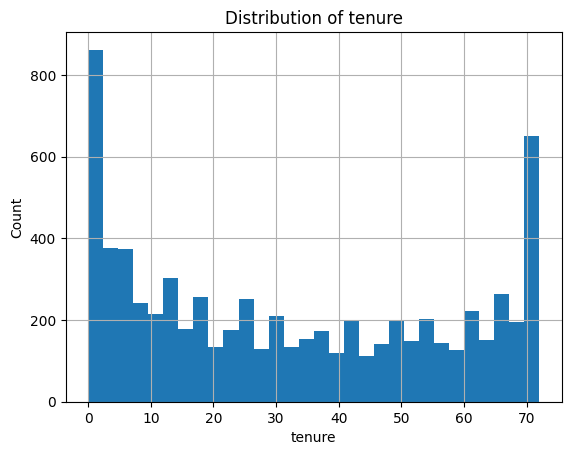

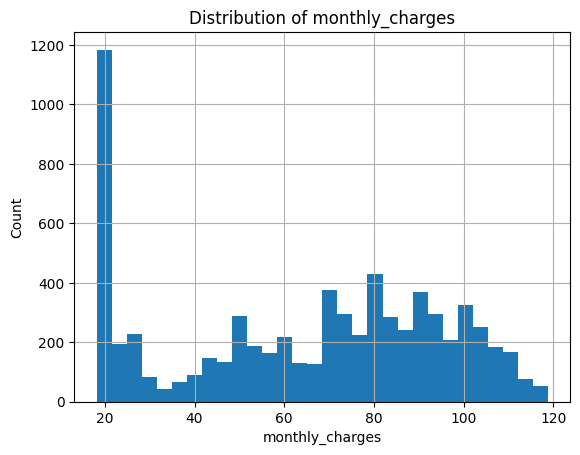

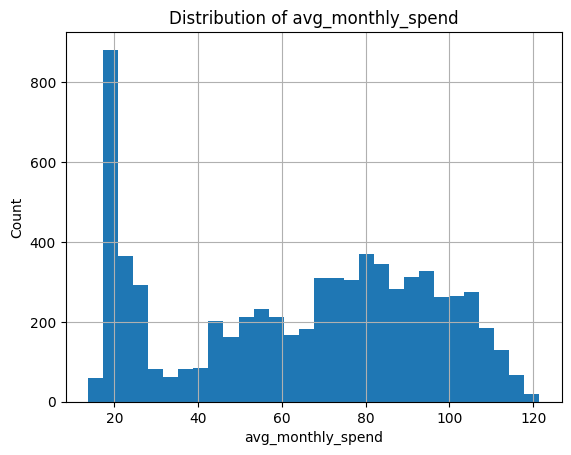

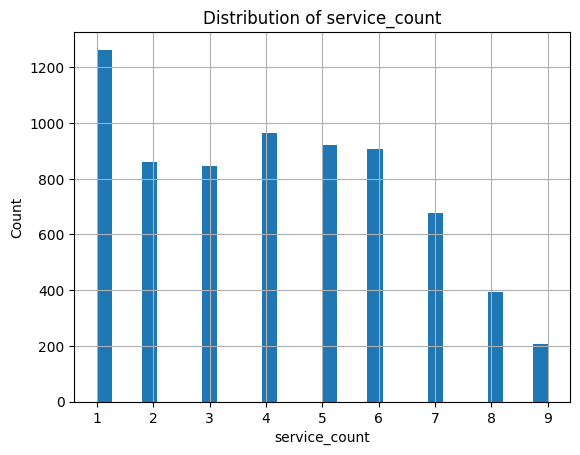

In [18]:
num_features = [
    "tenure",
    "monthly_charges",
    "avg_monthly_spend",
    "service_count"
]

import matplotlib.pyplot as plt

for col in num_features:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


<Figure size 640x480 with 0 Axes>

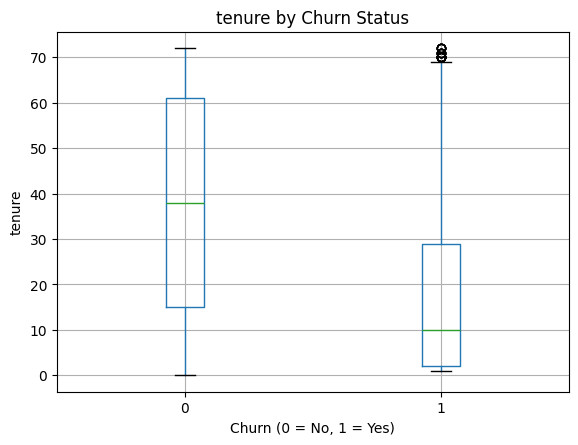

<Figure size 640x480 with 0 Axes>

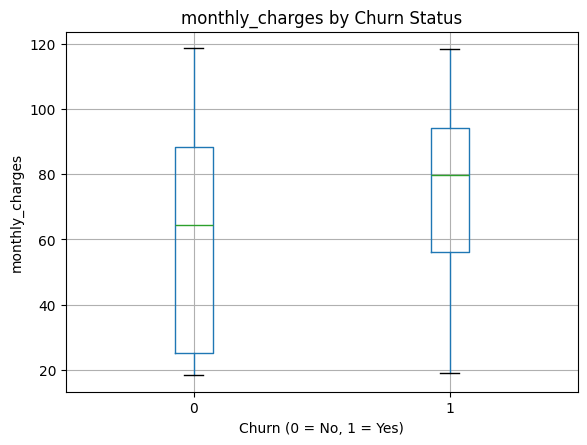

<Figure size 640x480 with 0 Axes>

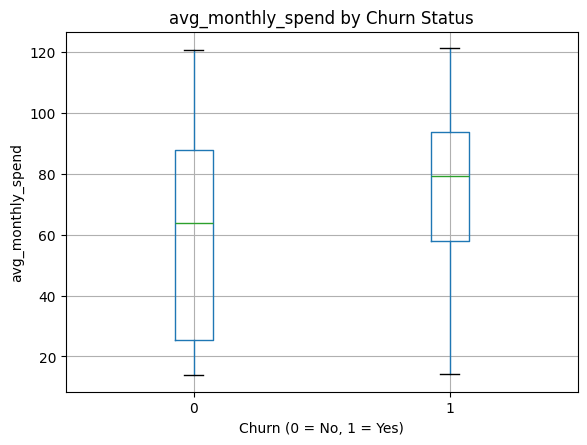

<Figure size 640x480 with 0 Axes>

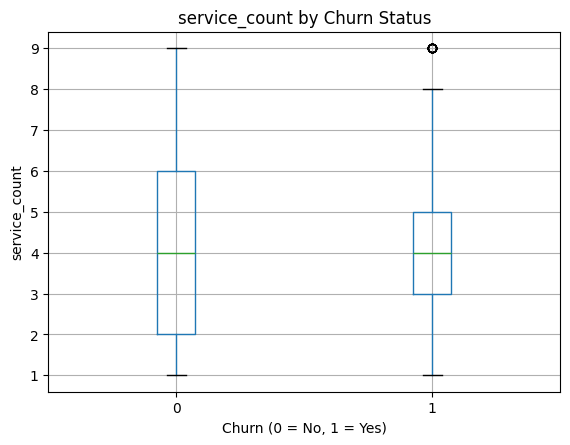

In [20]:
for col in num_features:
    plt.figure()
    df.boxplot(column=col, by="churn_flag")
    plt.title(f"{col} by Churn Status")
    plt.suptitle("")
    plt.xlabel("Churn (0 = No, 1 = Yes)")
    plt.ylabel(col)
    plt.show()

In [22]:
df.groupby("churn_flag")[num_features].mean()

,tenure,monthly_charges,avg_monthly_spend,service_count
churn_flag,,,,
0,37.569965,61.265124,61.312024,4.173174
1,17.979133,74.441332,74.433154,4.071696


In [24]:
df.groupby("churn_flag")[num_features].median()

,tenure,monthly_charges,avg_monthly_spend,service_count
churn_flag,,,,
0,38.0,64.425,64.040385,4.0
1,10.0,79.650,79.312500,4.0


In [28]:
df[num_features + ["churn_flag"]].corr()["churn_flag"].sort_values(ascending=False)

churn_flag           1.000000
monthly_charges      0.193356
avg_monthly_spend    0.192033
service_count       -0.019375
tenure              -0.352229
Name: churn_flag, dtype: float64